In [74]:
import pandas as pd
import matplotlib.pyplot as plt

Carichiamo il nostro dataset, controllando che venga stampato correttamente.

In [75]:
df = pd.read_csv("./vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Riportiamo il numero di istanze non nulle e il loro data-type.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Visualizziamo chiaramente il numero di valori mancanti per feature.
Possiamo vedere che la percentuale di valori nulli è bassa, rendendo il dataset da noi scelto relativamente completo.

In [77]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [78]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Significato delle Feature

- **`Rank`** indica il punteggio del gioco in base a un sistema di ranking basato sulle vendite complessive
- **`Name`** indica il nome del gioco
- **`Platform`** indica la piattaforma su cui è stato rilasciato il gioco
- **`Year`** indica l'anno in cui è stato pubblicato il gioco
- **`Genre`** indica il genere del gioco
- **`Publisher`** indica l'azienda che ha pubblicato il gioco
- **`NA_Sales`** indica il numero di copie vendute in nord America (in milioni)
- **`EU_Sales`** indica il numero di copie vendute in Europa (in milioni)
- **`JP_Sales`** indica il numero di copie vendute in Giappone (in milioni)
- **`Other_Sales`** indica il numero di copie vendute nel resto del mondo (in milioni)
- **`Global_Sales`** indica il numero complessivo di copie vendute (in milioni)

Visualizziamo quali piattaforme, generi e anni di pubblicazione prende in considerazione il dataset.

In [79]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [80]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [81]:
df["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

Il dataset non è dei più recenti, in quanto si ferma al 2020. C'è un gap tra il 2017 e il 2020.
Da allora sono uscite altre piattaforme che hanno registrato vendite importanti ma che per qualche motivo non sono state incluse nel dataset (e.g: Nintendo Switch, PS5).

Controlliamo la presenza di dati duplicati.

In [82]:
df.duplicated().sum()

np.int64(0)

Sembra che ogni riga nel dataset sia unica.
Ora controlliamo se i nomi di alcuni giochi appaiono più volte.

In [83]:
df.duplicated(subset='Name').sum()

np.int64(5105)

In [84]:
# Ottengo i titoli duplicati e le loro rispettive piattaforme
duplicated_games_with_platforms = df[df.duplicated(subset='Name', keep=False)]

# Raggruppo per Name, aggrego le piattaforme in una lista e conto quante volte appaiono
platforms_and_counts = duplicated_games_with_platforms.groupby('Name').agg(
    Platforms=('Platform', list),
    Count=('Platform', 'size')  # Count occurrences
)

# Sorting
sorted_platforms_and_counts = platforms_and_counts.sort_values(by='Count', ascending=False)

print(sorted_platforms_and_counts)


                                                                          Platforms  \
Name                                                                                  
Need for Speed: Most Wanted       [PS2, PS3, X360, X360, PSV, XB, GC, PC, WiiU, ...   
Ratatouille                             [DS, PS2, PSP, PS3, Wii, X360, GBA, GC, PC]   
FIFA 14                              [PS3, X360, PS4, XOne, PSV, PC, Wii, 3DS, PSP]   
Madden NFL 07                           [PS2, X360, XB, PSP, GC, PS3, Wii, DS, GBA]   
LEGO Marvel Super Heroes             [X360, PS3, PS4, XOne, 3DS, WiiU, PSV, DS, PC]   
...                                                                             ...   
Yakuza                                                                   [PS2, PS3]   
18 Wheeler: American Pro Trucker                                          [PS2, GC]   
187: Ride or Die                                                          [PS2, XB]   
2014 FIFA World Cup Brazil                 

I titoli di molti giochi appaiono più volte in quanto pubblicati su diverse piattaforme.

Ora controlliamo quali sono i giochi più venduti per genere.

In [85]:
# Raggruppa per genere e ottiene l'index del gioco con il maggior numero di vendite
most_sales_per_genre = df.loc[df.groupby('Genre')['Global_Sales'].idxmax()]

print("Giochi con maggior numero di vendite per genere:")
print(most_sales_per_genre)

Giochi con maggior numero di vendite per genere:
     Rank                                Name Platform    Year         Genre  \
16     17                  Grand Theft Auto V      PS3  2013.0        Action   
50     51  Super Mario Land 2: 6 Golden Coins       GB  1992.0     Adventure   
39     40             Super Smash Bros. Brawl      Wii  2008.0      Fighting   
7       8                            Wii Play      Wii  2006.0          Misc   
1       2                   Super Mario Bros.      NES  1985.0      Platform   
5       6                              Tetris       GB  1989.0        Puzzle   
2       3                      Mario Kart Wii      Wii  2008.0        Racing   
4       5            Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
9      10                           Duck Hunt      NES  1984.0       Shooter   
10     11                          Nintendogs       DS  2005.0    Simulation   
0       1                          Wii Sports      Wii  2006.0        S

Stampiamo i 3 giochi d'azione che hanno registrato più vendite globali.

In [86]:
top3_shooter_games = df.groupby("Genre").get_group("Shooter").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_shooter_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


Stampiamo i 3 giochi di corse che hanno registrato più vendite
globali.

In [87]:
top3_racing_games = df.groupby("Genre").get_group("Racing").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_racing_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98


Stampiamo i 3 giochi d'avventura che hanno registrato più vendite globali.

In [88]:
top3_adventure_games = df.groupby("Genre").get_group("Adventure").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_adventure_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
158,159,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38


Stampiamo i 3 giochi d'azione che hanno registrato più vendite globali.

In [89]:
top3_action_games = df.groupby("Genre").get_group("Action").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_action_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15


Stampiamo i 3 giochi platforming che hanno registrato più vendite globali.

In [90]:
top3_platform_games = df.groupby("Genre").get_group("Platform").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_platform_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


Stampiamo i 3 giochi di ruolo che hanno registrato più vendite globali.

In [91]:
top3_rp_games = df.groupby("Genre").get_group("Role-Playing").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_rp_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


Stampiamo i 3 giochi picchiaduro che hanno registrato più vendite globali.

In [92]:
top3_fighting_games = df.groupby("Genre").get_group("Fighting").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_fighting_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
105,106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16


Stampiamo i 3 giochi di simulazione che hanno registrato più vendite globali.

In [93]:
top3_simulation_games = df.groupby("Genre").get_group("Simulation").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_simulation_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
73,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09


Stampiamo i 3 giochi di strategia che hanno registrato più vendite globali.

In [94]:
top3_strategy_games = df.groupby("Genre").get_group("Strategy").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_strategy_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
165,166,Pokemon Stadium,N64,1999.0,Strategy,Nintendo,3.18,1.24,0.94,0.09,5.45
204,205,Warzone 2100,PS,1999.0,Strategy,Eidos Interactive,2.79,1.89,0.00,0.33,5.01
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.00,0.59,4.83


Stampiamo i 3 giochi di categorie miste che hanno registrato più vendite globali.

In [95]:
top3_misc_games = df.groupby("Genre").get_group("Misc").sort_values("Global_Sales", ascending=False).drop_duplicates(subset="Name").head(3)

top3_misc_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22


Andiamo a stampare i generi in ordine di vendite globali.

In [96]:
most_sold_genre = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

most_sold_genre

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


Lo mettiamo per istogramma.

Text(0, 0.5, 'Global Sales')

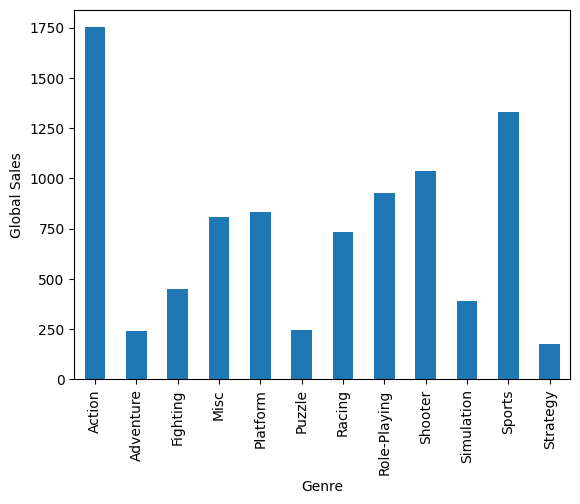

In [97]:
genre_sales = df.groupby('Genre')['Global_Sales']

genre_sales

genre_sales_hist = genre_sales.sum().plot(kind='bar')
plt.ylabel('Global Sales')

Stampiamo il gioco che ha registrato più vendite globalmente e in ogni regione.

In [98]:
sales_by_game = df.groupby("Name").sum(numeric_only=True)

top_sold_by_region = pd.DataFrame({
    "Top Game": {
        region: sales_by_game[region].idxmax()
        for region in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
    },
    "Sales": {
        region: sales_by_game[region].max()
        for region in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
    }
})

top_sold_by_region


,Top Game,Sales
NA_Sales,Wii Sports,41.49
EU_Sales,Wii Sports,29.02
JP_Sales,Pokemon Red/Pokemon Blue,10.22
Other_Sales,Grand Theft Auto: San Andreas,10.72
Global_Sales,Wii Sports,82.74


Visualizziamo graficamente l'andamento delle vendite registrate nel dataset, partendo da quelle globali.

<Axes: title={'center': 'Global Video Game Sales Over Time'}, xlabel='Year', ylabel='Global Sales (millions)'>

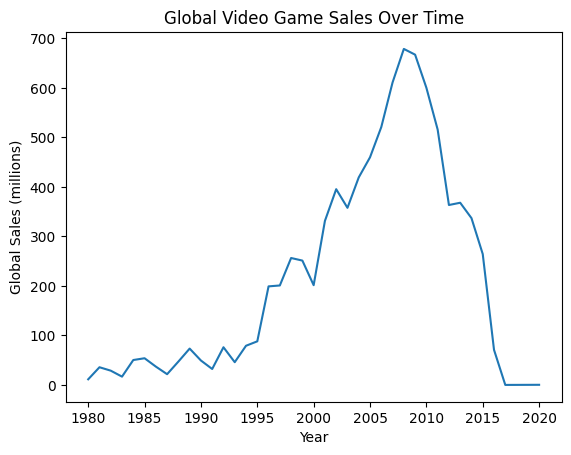

In [99]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["Global_Sales"].plot(
    kind="line",
    title="Global Video Game Sales Over Time",
    xlabel="Year",
    ylabel="Global Sales (millions)"
)

In [100]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["Global_Sales"].idxmax())
peak_sales = sales_by_year["Global_Sales"].max()

print(f"Le maggior vendite di videogiochi a livello globale sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")


Le maggior vendite di videogiochi a livello globale sono avvenute nel 2008 con 678.90 vendite


<Axes: title={'center': 'NA Video Game Sales Over Time'}, xlabel='Year', ylabel='North America Sales (millions)'>

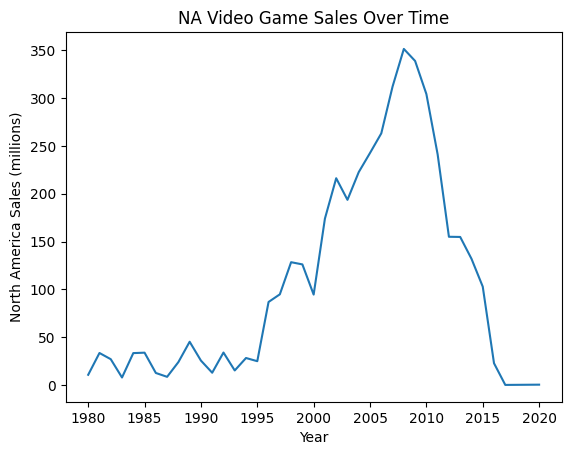

In [101]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["NA_Sales"].plot(
    kind="line",
    title="NA Video Game Sales Over Time",
    xlabel="Year",
    ylabel="North America Sales (millions)"
)

In [102]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["NA_Sales"].idxmax())
peak_sales = sales_by_year["NA_Sales"].max()

print(f"Le maggior vendite di videogiochi in NA sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")


Le maggior vendite di videogiochi in NA sono avvenute nel 2008 con 351.44 vendite


<Axes: title={'center': 'JP Video Game Sales Over Time'}, xlabel='Year', ylabel='Japanese Sales (millions)'>

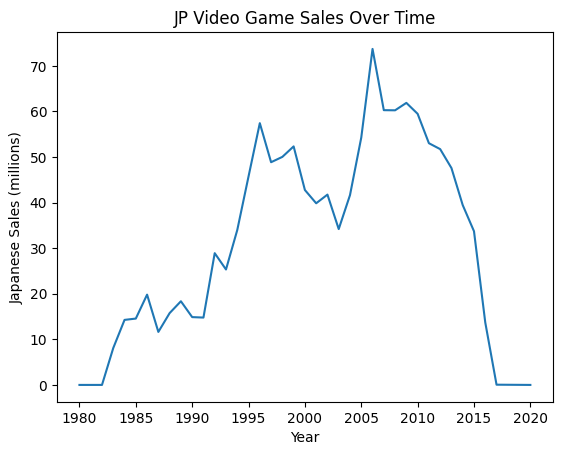

In [103]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["JP_Sales"].plot(
    kind="line",
    title="JP Video Game Sales Over Time",
    xlabel="Year",
    ylabel="Japanese Sales (millions)"
)

In [104]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["JP_Sales"].idxmax())
peak_sales = sales_by_year["JP_Sales"].max()

print(f"Le maggior vendite di videogiochi in JP sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")


Le maggior vendite di videogiochi in JP sono avvenute nel 2006 con 73.73 vendite


<Axes: title={'center': 'EU Video Game Sales Over Time'}, xlabel='Year', ylabel='Europe Sales (millions)'>

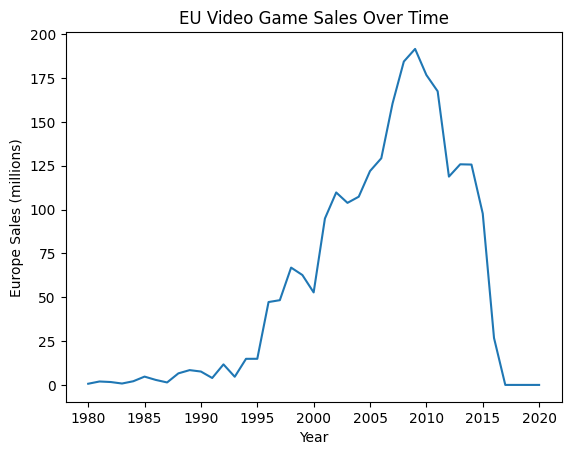

In [105]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["EU_Sales"].plot(
    kind="line",
    title="EU Video Game Sales Over Time",
    xlabel="Year",
    ylabel="Europe Sales (millions)"
)

In [106]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["EU_Sales"].idxmax())
peak_sales = sales_by_year["EU_Sales"].max()

print(f"Le maggior vendite di videogiochi in EU sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")

Le maggior vendite di videogiochi in EU sono avvenute nel 2009 con 191.59 vendite


Nonostante i "picchi" diversi, è interessante osservare come l'andamento delle vendite in Europa sia molto simile a quello in Nord America, mentre i dati registrati riguardo al mercato giapponese si discostano più notevolmente.

Facciamo un confronto anno per anno delle vendite.

In [107]:
yearly_sales = df.groupby('Year').agg(
    JP_Sales=('JP_Sales', 'sum'),
    NA_Sales=('NA_Sales', 'sum'),
    EU_Sales=('EU_Sales', 'sum'),
    Other_Sales=('Other_Sales', 'sum'),
).reset_index()

yearly_sales

,Year,JP_Sales,NA_Sales,EU_Sales,Other_Sales
0,1980.0,0.00,10.59,0.67,0.12
1,1981.0,0.00,33.40,1.96,0.32
2,1982.0,0.00,26.92,1.65,0.31
3,1983.0,8.10,7.76,0.80,0.14
4,1984.0,14.27,33.28,2.10,0.70
5,1985.0,14.56,33.73,4.74,0.92
6,1986.0,19.81,12.50,2.84,1.93
7,1987.0,11.63,8.46,1.41,0.20
8,1988.0,15.76,23.87,6.59,0.99
9,1989.0,18.36,45.15,8.44,1.50


E' interessante osservare che in alcuni anni non vengono registrate vendite per certe regioni.

In [108]:
df[(df['Year'] == 1980)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
544,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4025,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
6317,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [109]:
df[(df['Year'] == 1981)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
734,736,Frogger,2600,1981.0,Action,Parker Bros.,2.06,0.12,0.0,0.02,2.20
766,768,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,0.12,0.0,0.02,2.13
864,866,E.T.: The Extra Terrestrial,2600,1981.0,Action,Atari,1.84,0.11,0.0,0.02,1.97
1106,1108,Ms. Pac-Man,2600,1981.0,Puzzle,Atari,1.54,0.10,0.0,0.02,1.65
1153,1155,River Raid,2600,1981.0,Shooter,Activision,1.49,0.09,0.0,0.02,1.60
1306,1308,Donkey Kong,2600,1981.0,Platform,Coleco,1.36,0.08,0.0,0.02,1.46
1429,1431,Centipede,2600,1981.0,Shooter,Atari,1.26,0.08,0.0,0.01,1.36
1556,1558,Atlantis,2600,1981.0,Shooter,Imagic,1.18,0.08,0.0,0.01,1.27
1848,1850,Megamania,2600,1981.0,Shooter,Activision,1.03,0.06,0.0,0.01,1.10


In [110]:
df[(df['Year'] == 1982)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1115,1117,Dig Dug,2600,1982.0,Puzzle,Atari,1.52,0.10,0.0,0.02,1.64
1163,1165,Mario Bros.,2600,1982.0,Platform,Atari,1.48,0.09,0.0,0.02,1.59
1705,1707,Pole Position,2600,1982.0,Racing,Atari,1.10,0.07,0.0,0.01,1.18
1817,1819,Moon Patrol,2600,1982.0,Shooter,Atari,1.05,0.06,0.0,0.01,1.12
1851,1853,Jungle Hunt,2600,1982.0,Platform,Atari,1.03,0.06,0.0,0.01,1.10
1905,1907,Joust,2600,1982.0,Platform,Atari,1.01,0.06,0.0,0.01,1.08
2406,2408,Enduro,2600,1982.0,Misc,Quelle,0.81,0.05,0.0,0.01,0.87
2629,2631,Yars' Revenge,2600,1982.0,Shooter,Atari,0.73,0.04,0.0,0.01,0.78
2660,2662,Galaxian,2600,1982.0,Shooter,Atari,0.72,0.05,0.0,0.01,0.77


L'assenza di vendite registrate in territorio giapponese potrebbe essere giustificata dal fatto che il dataset, in questo range di anni, contiene solamente giochi pubblicati su Atari 2600.
Questa console è stata lanciata sul mercato giapponese solo nel 1983, anno in cui è pure uscito il NES.

Indaghiamo anche riguardo il 2017 e il 2020.

In [111]:
df[df['Year'] == 2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


In [112]:
df[df['Year'] == 2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In questo caso si tratta di una mancanza e un errore all'interno del dataset, probabilmente legato al processo di scraping dei dati.
Per l'anno 2017 sono stati registrati solamente 3 giochi (per di più esclusive giapponesi), ed è inverosimile che un tale quantitativo di persone abbia deciso di comprare un gioco per Nintendo DS pubblicato nel 2008.

Visualizziamo graficamente un confronto tra le vendite delle diverse regioni nel corso degli anni.

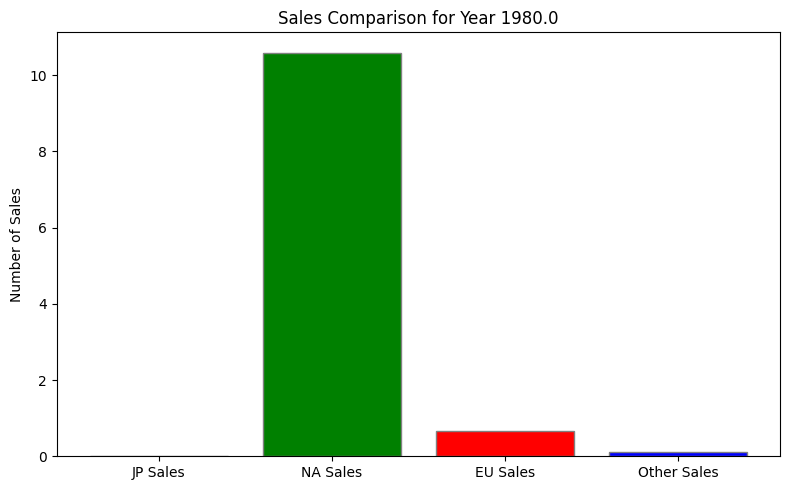

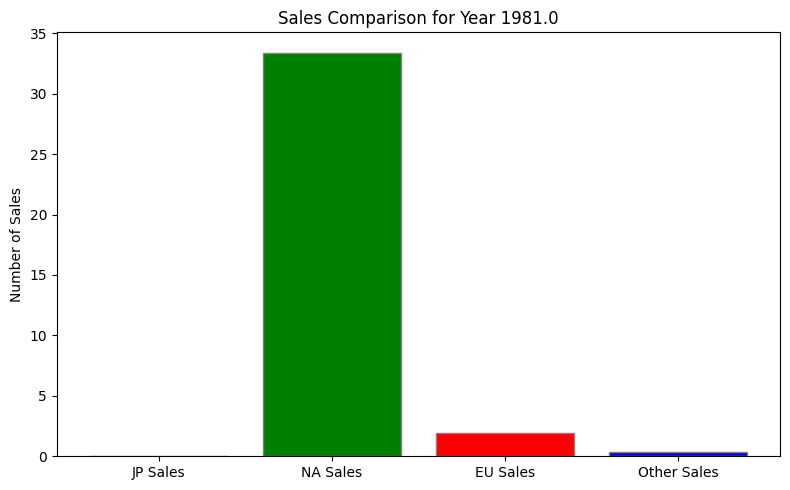

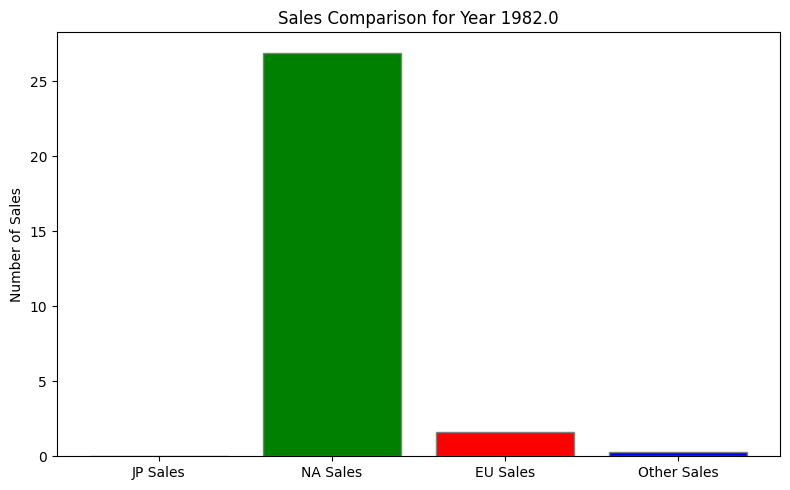

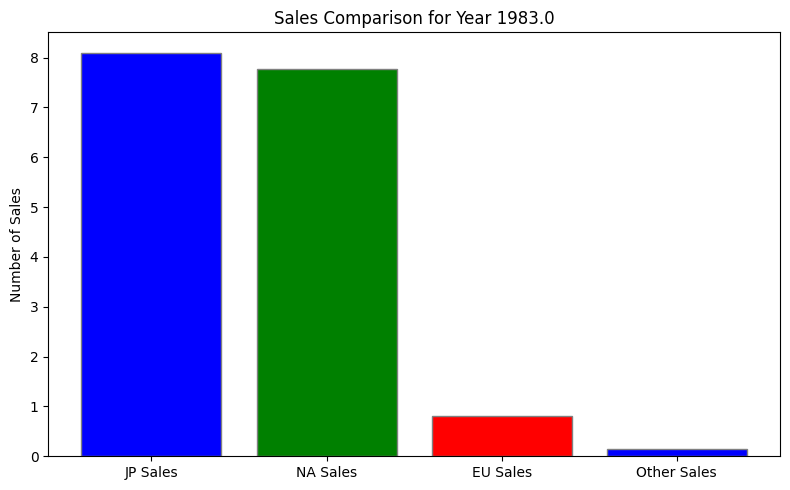

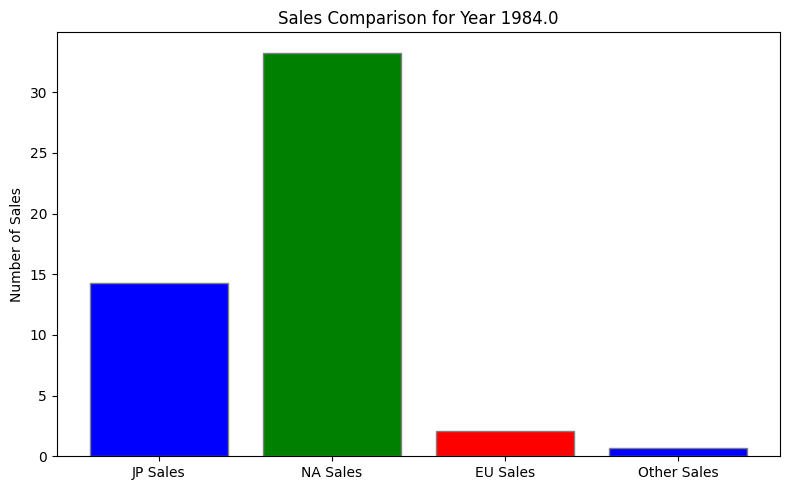

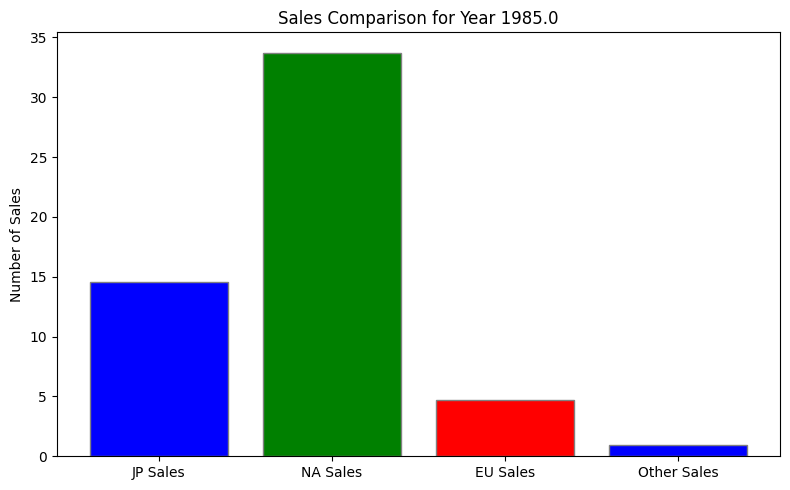

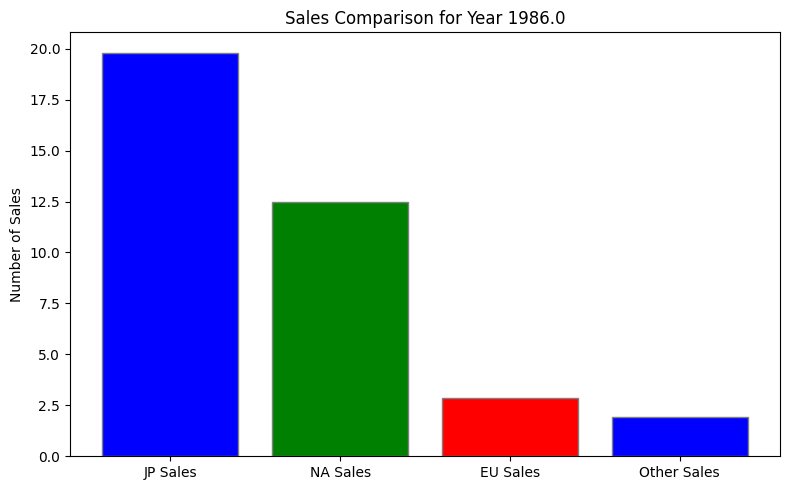

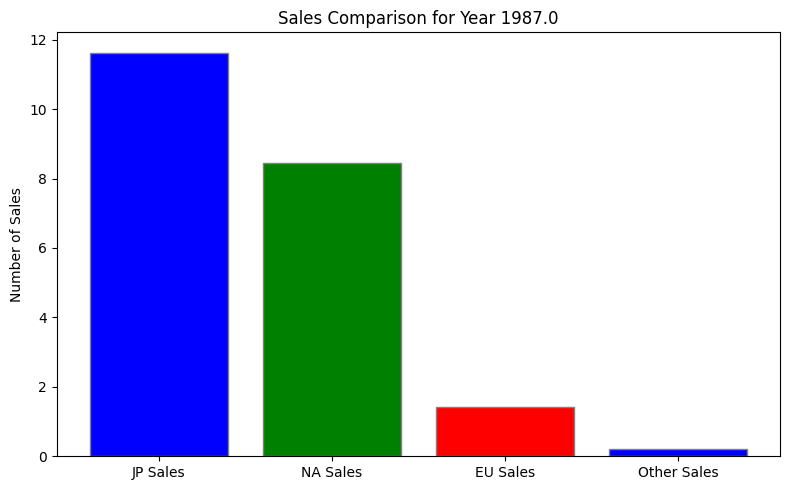

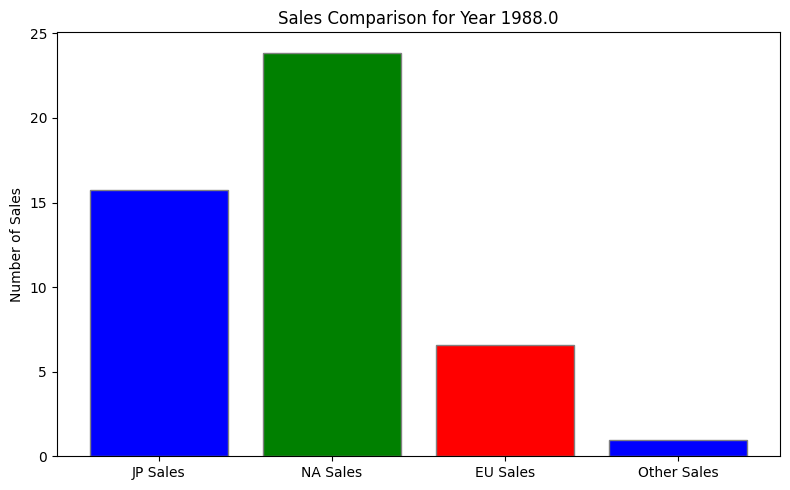

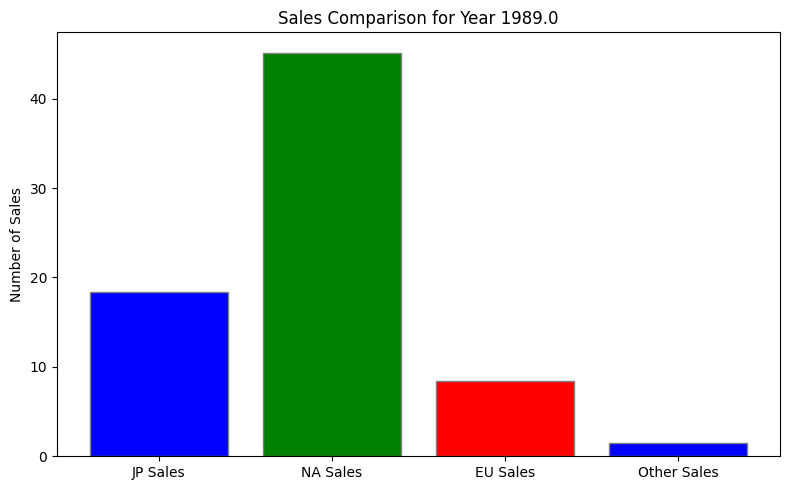

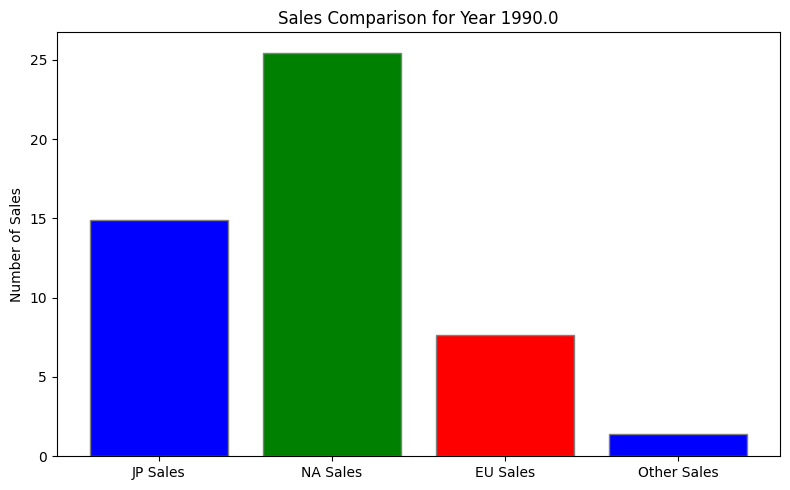

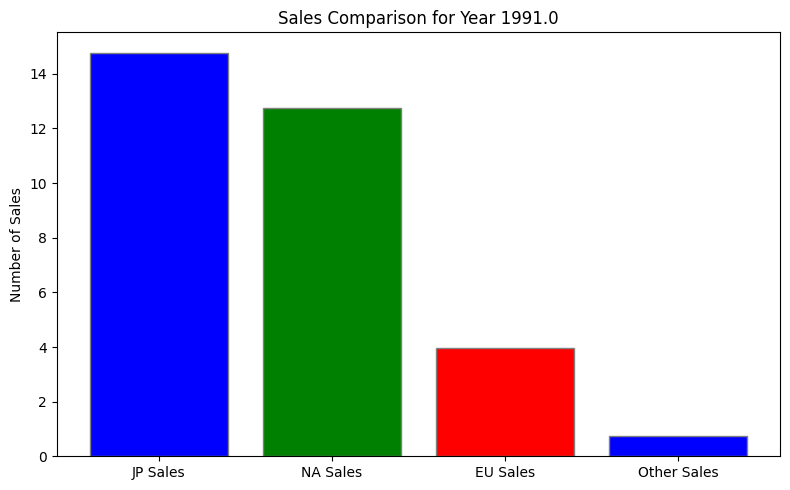

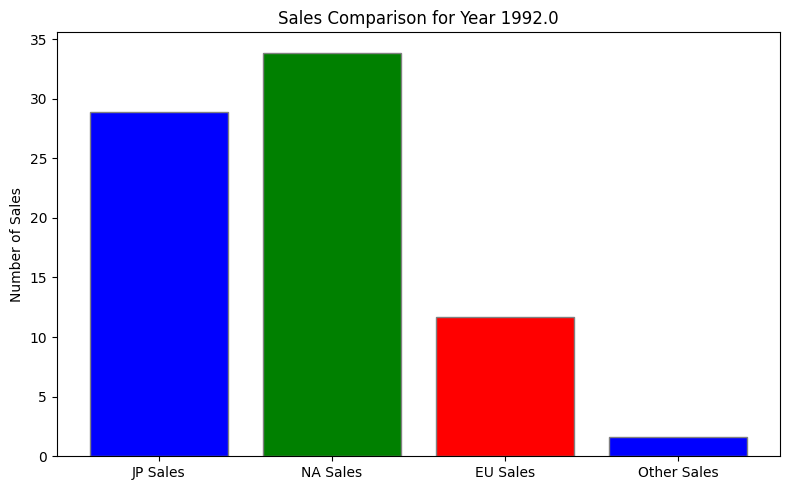

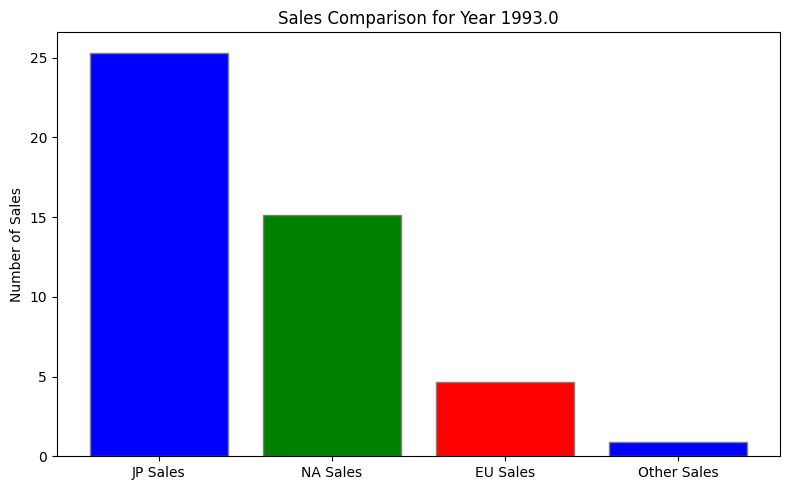

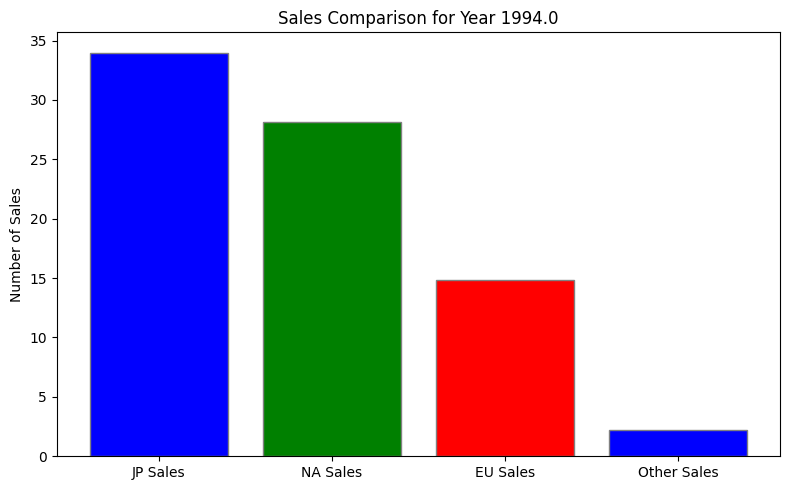

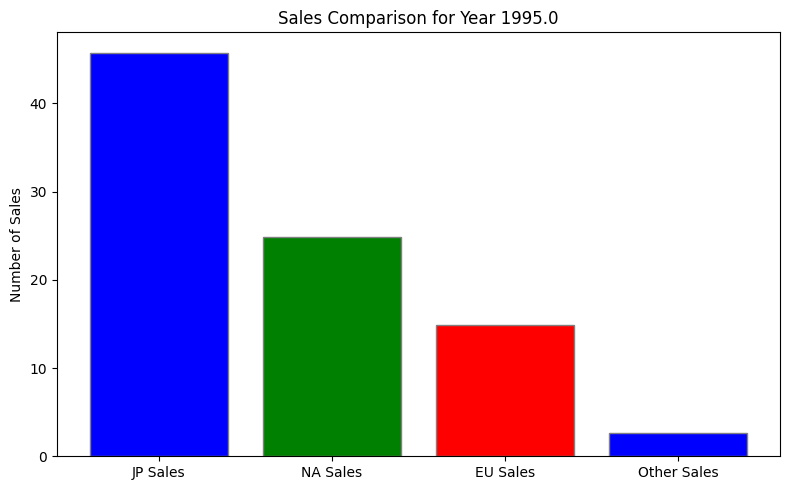

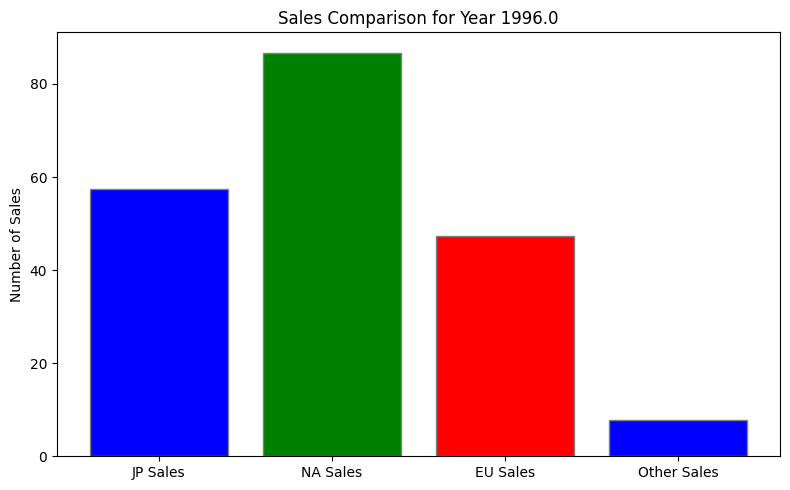

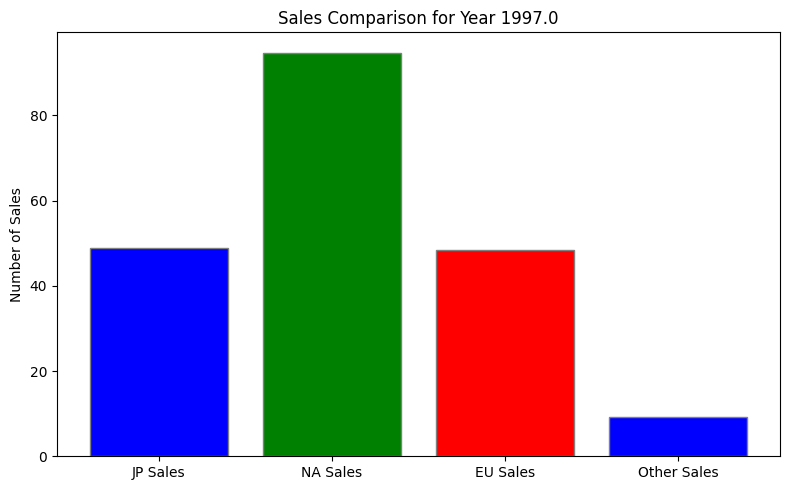

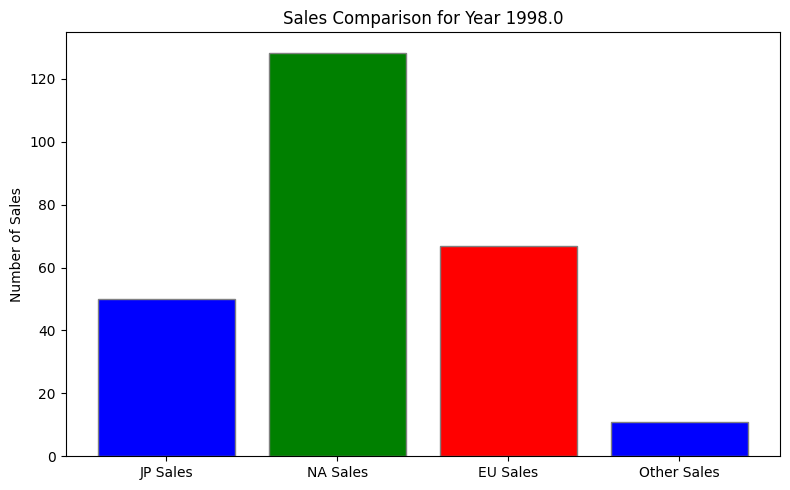

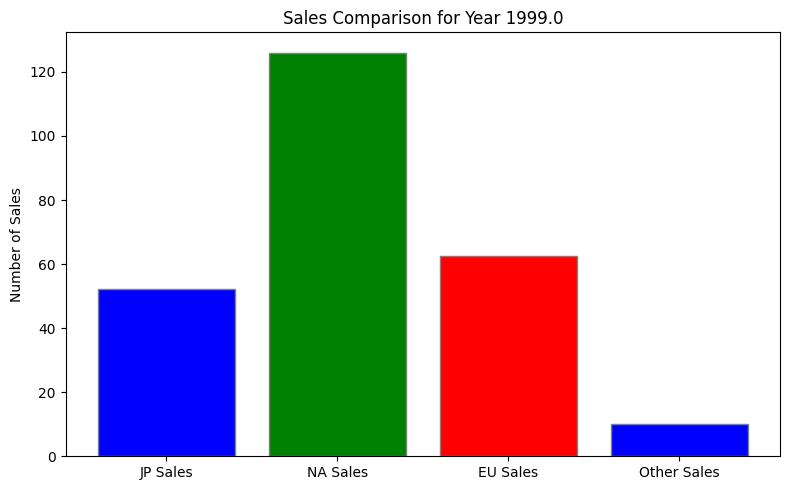

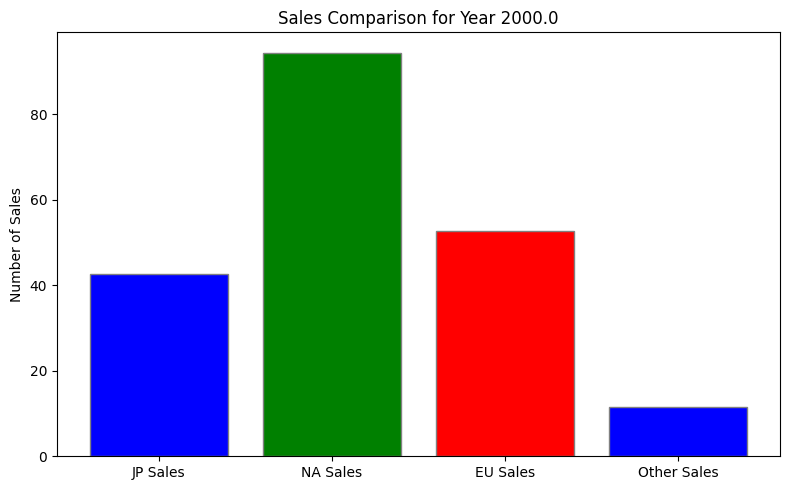

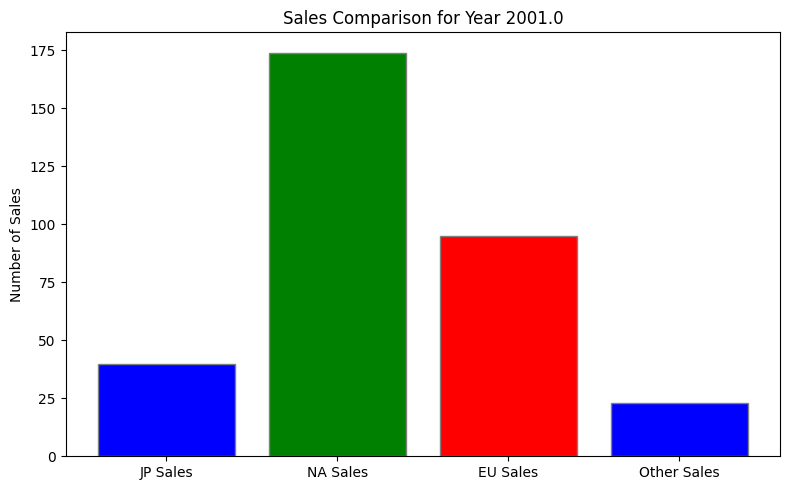

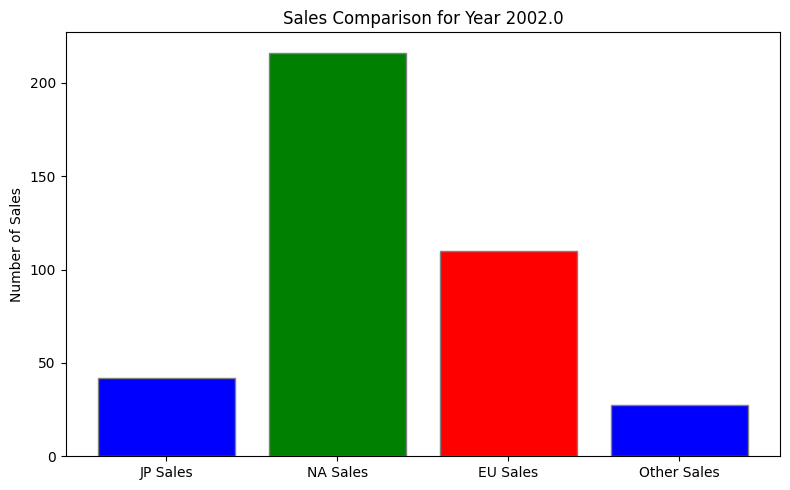

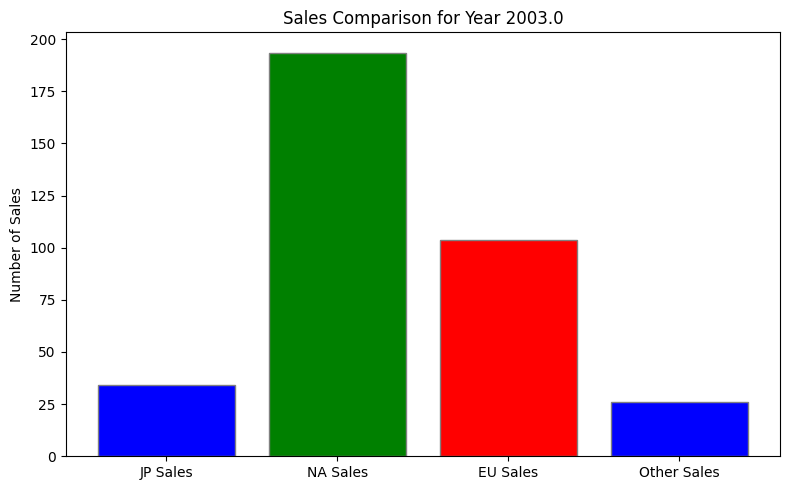

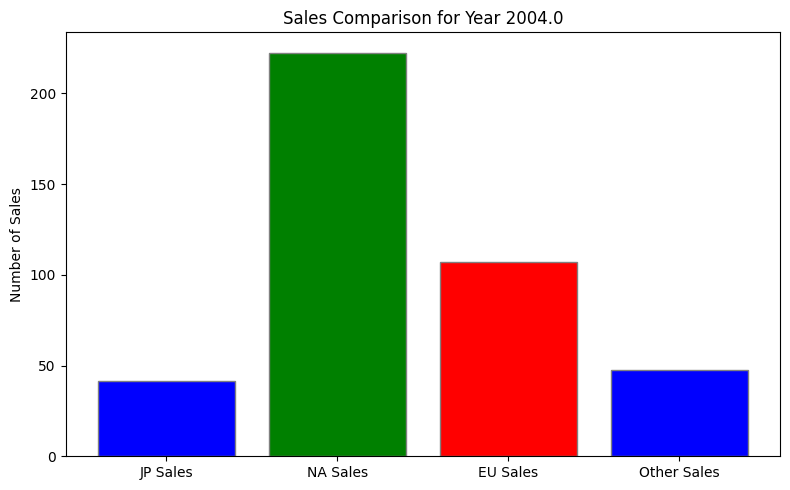

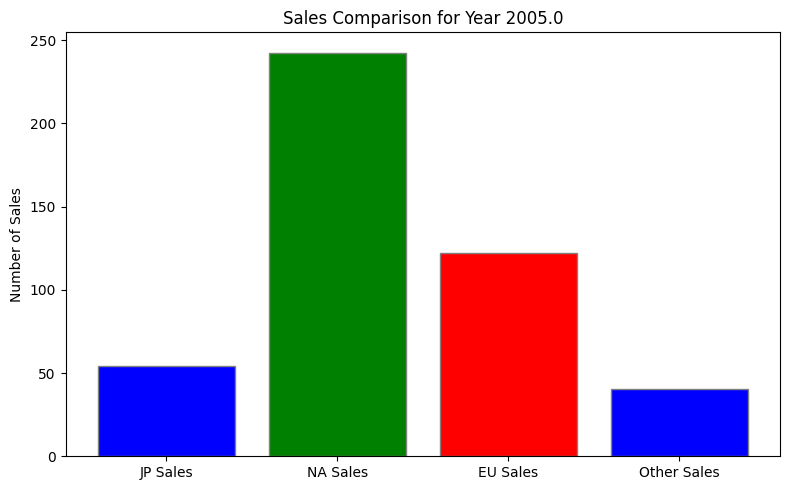

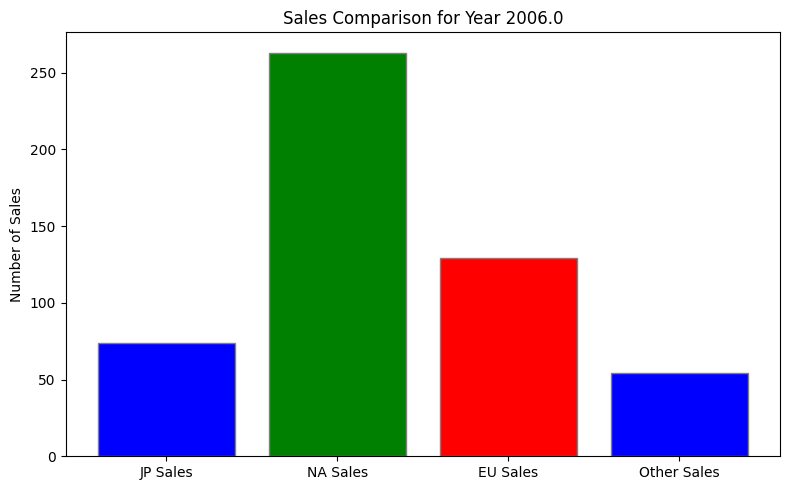

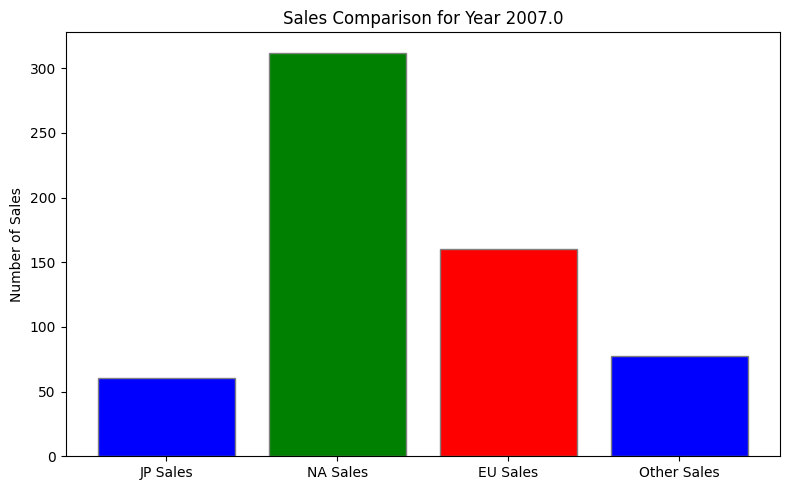

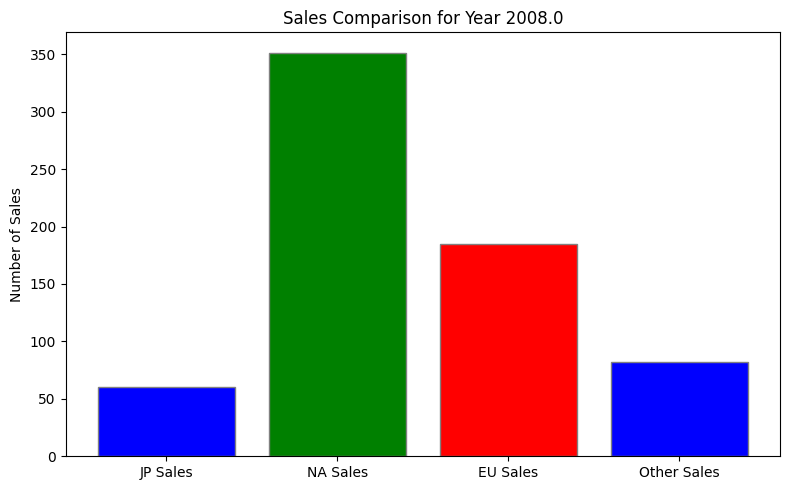

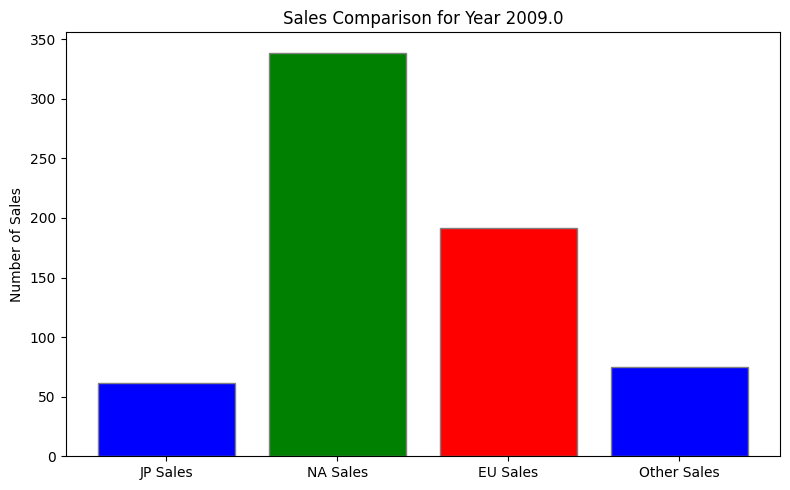

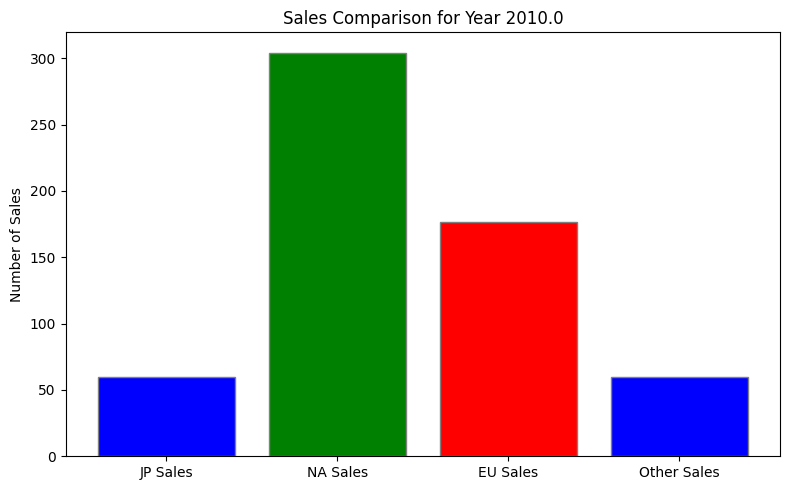

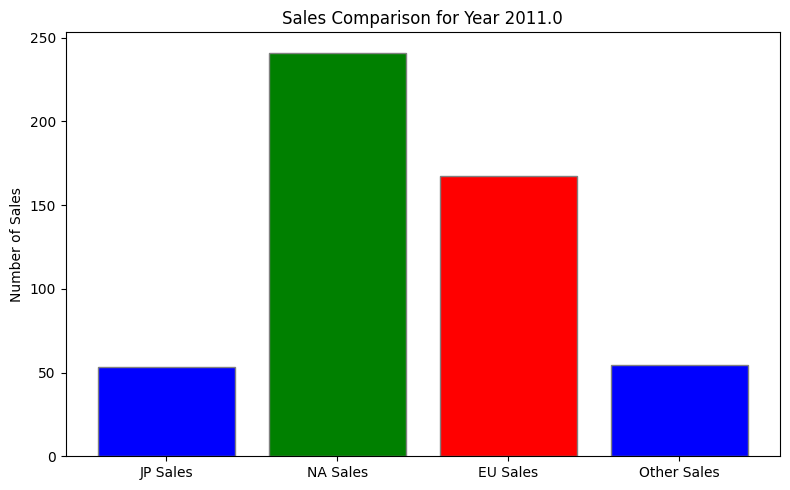

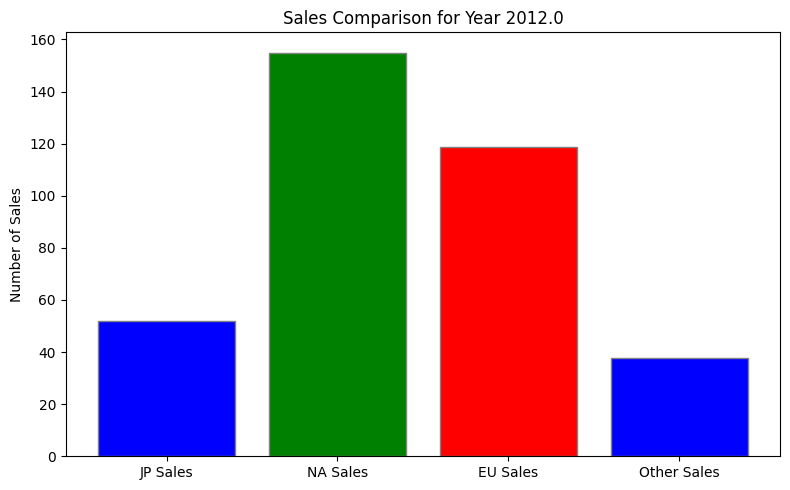

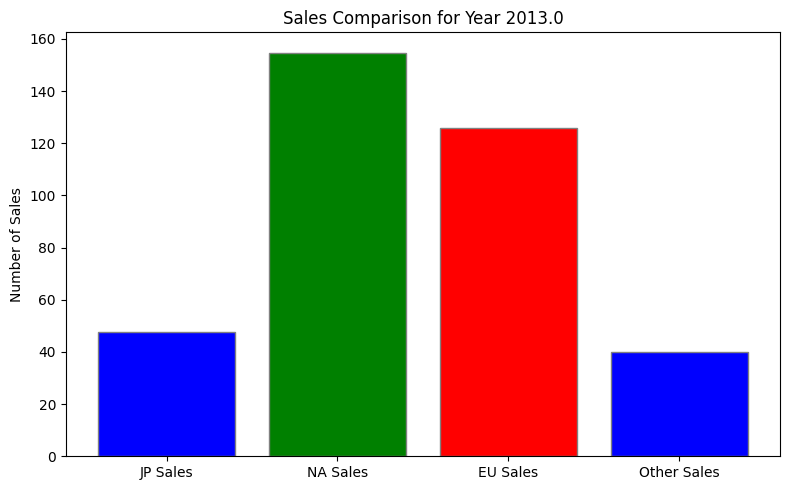

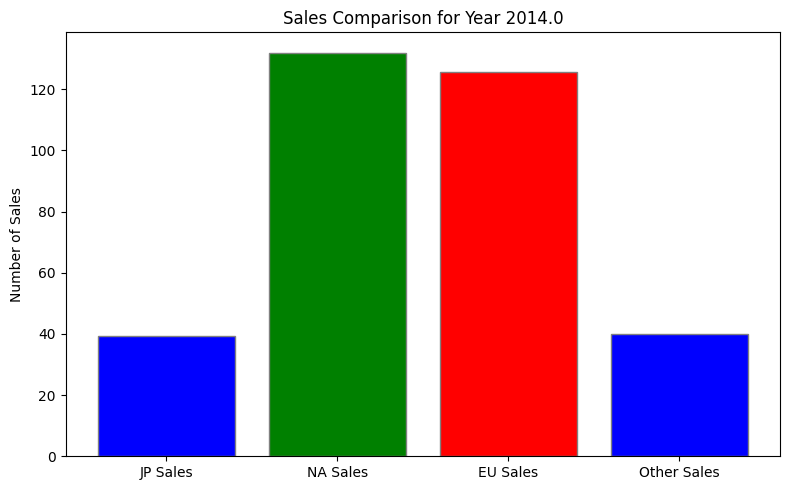

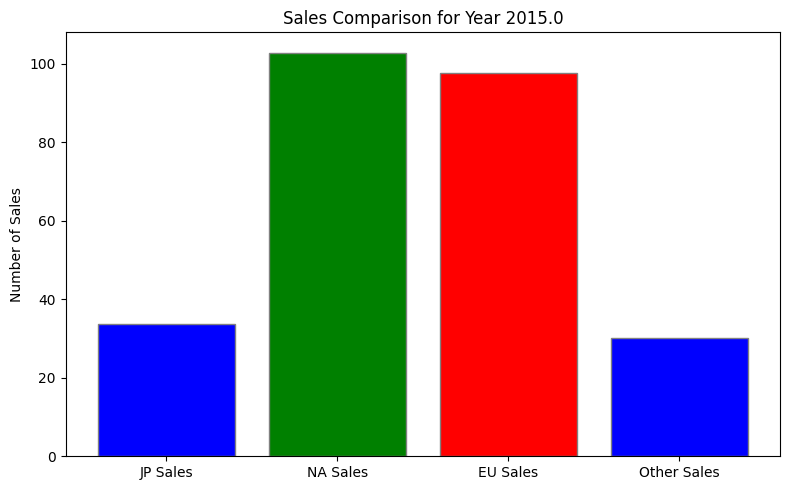

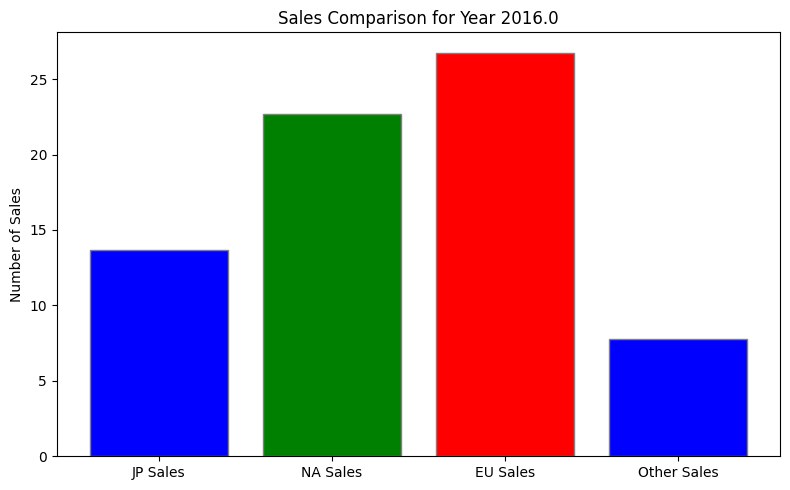

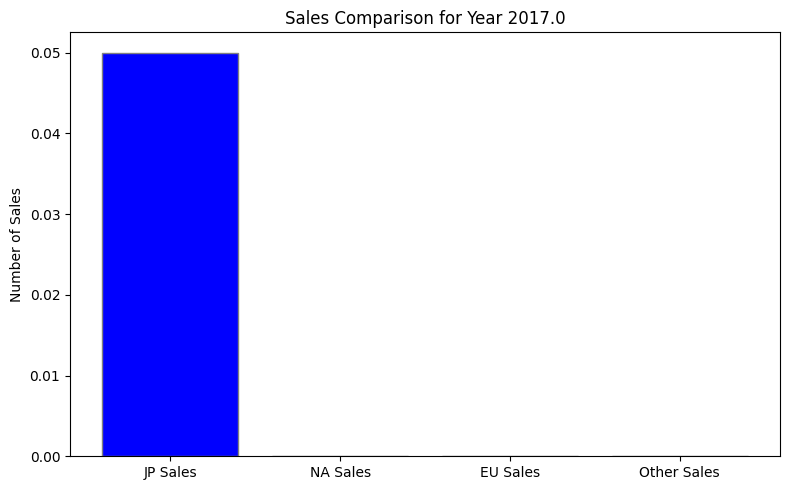

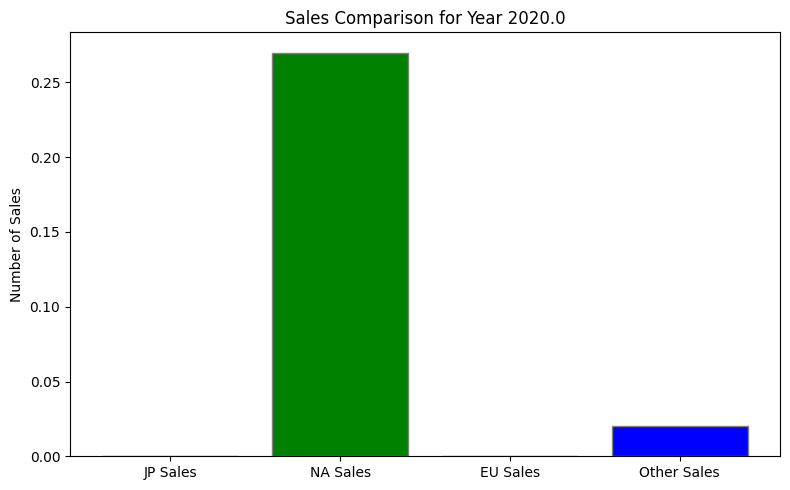

In [113]:
# Create individual graphs for each year
for index, row in yearly_sales.iterrows():
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sales = [row['JP_Sales'], row['NA_Sales'], row['EU_Sales'], row['Other_Sales']]
    labels = ['JP Sales', 'NA Sales', 'EU Sales', 'Other Sales']

    plt.bar(labels, sales, color=['blue', 'green', 'red'], edgecolor='grey')

    # Add labels and title
    plt.title(f'Sales Comparison for Year {row["Year"]}')
    plt.ylabel('Number of Sales')

    # Show the plot for each year
    plt.tight_layout()
    plt.show()

In [114]:
df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
...,...
Epic Games,0.01
UIG Entertainment,0.01
Commseed,0.01


In [115]:
df.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False)

,JP_Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08
...,...
Gremlin Interactive Ltd,0.00
Griffin International,0.00
Groove Games,0.00


In [116]:
df[df["Publisher"] == "Nintendo"]["Name"].count()

np.int64(703)

In [117]:
df.groupby("Publisher")["Name"].count().sort_values(ascending=False)

,Name
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
iWin,1
fonfun,1
Valve,1


In [118]:
df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


In [119]:
df.groupby("Platform")["Name"].count().sort_values(ascending=False)

,Name
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


In [120]:
most_sold_games = (df.groupby("Name")
    .agg(Platform_Count=("Platform", "nunique"),Global_Sales=("Global_Sales", "sum")
        )
    .query("Platform_Count > 1")
    .sort_values("Global_Sales", ascending=False)
    .reset_index()
                  )

most_sold_games

,Name,Platform_Count,Global_Sales
0,Grand Theft Auto V,5,55.92
1,Super Mario Bros.,2,45.31
2,Tetris,2,35.84
3,Call of Duty: Black Ops,5,31.03
4,Call of Duty: Modern Warfare 3,4,30.83
...,...,...,...
2769,WSC REAL 09: World Snooker Championship,2,0.02
2770,Aquaman: Battle for Atlantis,2,0.02
2771,Akatsuki no Goei Trinity,2,0.02
2772,Sakura-Sou no Pet na Kanojo,2,0.02


Andiamo adesso a vedere i giochi che hanno venduto di più per regione per ogni anno.

Iniziamo con il NA.

In [153]:
top_game_per_year = (
    df.groupby(["Year", "Name"])["NA_Sales"]
      .sum()
      .reset_index()
      .sort_values(["Year", "NA_Sales"], ascending=[True, False])
      .groupby("Year")
      .first()
)

top_game_per_year


,Name,NA_Sales
Year,,
1980.0,Asteroids,4.00
1981.0,Pitfall!,4.21
1982.0,Pac-Man,7.28
1983.0,Pitfall II: Lost Caverns,1.22
1984.0,Duck Hunt,26.93
1985.0,Super Mario Bros.,29.08
1986.0,The Legend of Zelda,3.74
1987.0,Zelda II: The Adventure of Link,2.19
1988.0,Super Mario Bros. 3,9.54
